In [1]:
import cPickle, string, numpy, getopt, sys, random, time, re

import onlineldavb

## Fetch a corpus

In [31]:
from sklearn.datasets import fetch_20newsgroups

categories=['sci.space','sci.electronics','rec.motorcycles','rec.sport.baseball']

newsgroups_train = fetch_20newsgroups(subset='train')
#                                      categories=categories)

## Set parameters for SVI

In [39]:
K = len(categories) #Number of topics
D = len(newsgroups_train.data) #Number of documents
batchsize = 100
num_iterations = 1000
kappa = 0.9 #Learning rate

## Get vocabulary

In [50]:
ps = PorterStemmer()

def stem(sentance):
    q = sentance.split()
    s2= []
    for i in q:
        s2.append(ps.stem(i))
    return ' '.join(s2)

vectorizer = CountVectorizer()
dat=[]
sl=len(newsgroups_train.data)
for i in newsgroups_train.data:
    dat.append(stem(i))
    if len(dat)%100==0:
        print len(dat),sl
    

In [63]:
dat[0]

u"From: lerxst@wam.umd.edu (where' my thing) Subject: WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: Univers of Maryland, Colleg Park Lines: 15 I wa wonder if anyon out there could enlighten me on thi car I saw the other day. It wa a 2-door sport car, look to be from the late 60s/ earli 70s. It wa call a Bricklin. The door were realli small. In addition, the front bumper wa separ from the rest of the body. Thi is all I know. If anyon can tellm a model name, engin specs, year of production, where thi car is made, history, or whatev info you have on thi funki look car, pleas e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ----"

In [64]:
stem("equivalancies are hereby")

u'equival are herebi'

In [55]:
def getVocab(vectorizer):
    vocab = []
    most_frequent = numpy.max(vectorizer.vocabulary_.values())
    vocab_std = numpy.std(vectorizer.vocabulary_.values())
    vocab_mean = numpy.mean(vectorizer.vocabulary_.values())

    print "Num vocab: %d\nMost frequent: %d\nMean: %d\nStd: %d" % \
        (len(vectorizer.vocabulary_), most_frequent, vocab_mean, vocab_std)

    for key in vectorizer.vocabulary_:
        if vectorizer.vocabulary_[key] > vocab_mean - vocab_std and \
            vectorizer.vocabulary_[key] < vocab_mean + vocab_std:
            vocab.append(key)
    return vocab

vocab = getVocab(vectorizer)

Num vocab: 127316
Most frequent: 127315
Mean: 63657
Std: 36752


In [65]:
vectorizer = CountVectorizer()


vectors = vectorizer.fit(dat)
vocab = getVocab(vectors)

Num vocab: 127316
Most frequent: 127315
Mean: 63657
Std: 36752


In [70]:
stem(u'equivalencies')

u'equival'

In [71]:
v3={}
for i in vocab:
    v3[i]=stem(i)

In [73]:
def rep(s3):
    l2=[]
    for i in s3.split():
        l2.append(v3[i])
    return ' '.join(l2)
    

In [74]:
dat2=[]
for i in dat:
    dat2.append(rep(i))

KeyError: u'From:'

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stem(sentance):
    q = sentance.split()
    s2= []
    for i in q:
        s2.append(ps.stem(i))
    return ' '.join(s2)

vectorizer = CountVectorizer()
dat=[]
for i in newsgroups_train.data:
    dat.append(stem(i))
vectors = vectorizer.fit(dat)

def getVocab(vectorizer):
    vocab = []
    most_frequent = numpy.max(vectorizer.vocabulary_.values())
    vocab_std = numpy.std(vectorizer.vocabulary_.values())
    vocab_mean = numpy.mean(vectorizer.vocabulary_.values())

    print "Num vocab: %d\nMost frequent: %d\nMean: %d\nStd: %d" % \
        (len(vectorizer.vocabulary_), most_frequent, vocab_mean, vocab_std)

    for key in vectorizer.vocabulary_:
        if vectorizer.vocabulary_[key] > vocab_mean - vocab_std and \
            vectorizer.vocabulary_[key] < vocab_mean + vocab_std:
            vocab.append(key)
    return vocab

vocab = getVocab(vectorizer)

# Our vocabulary
# vocab = file('./dictnostops.txt').readlines()
# vocab = [v.strip() for v in vocab]
# W = len(vocab)

Num vocab: 127316
Most frequent: 127315
Mean: 63657
Std: 36752


In [87]:
import pickle
wds=pickle.load(open("semtrain.p",'rb'))

vectorizer = CountVectorizer()
dat=[]
for i in wds:
    dat.append(i[0])
    dat.append(i[1])
vectors = vectorizer.fit(dat)

vocab = getVocab(vectorizer)



Num vocab: 2200
Most frequent: 2199
Mean: 1099
Std: 635


In [91]:
vocab=vectorizer.vocabulary_.keys()

In [96]:
from nltk.corpus import stopwords

In [100]:
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource u'corpora/stopwords' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/Users/Mauceri/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [97]:
voc=[]
for i in vocab.keys():
    if i not in stopwords:
        voc.append(i)

TypeError: argument of type 'LazyCorpusLoader' is not iterable

In [49]:
from nltk.stem import PorterStemmer

## Function to get mini-batch

In [76]:
from random import sample

def getbatch(size, iteration):
    
    sample_idx = sample(range(D), size)
    return [newsgroups_train.data[i] for i in sample_idx]

## Train LDA model using SVI

In [92]:
kappa=0.9


print "Parameters: \n\t Num topics: %d \n\t Num documents: %d" % (K, D)
print "\t prior on weight vectors (theta): %4.2f \n\t prior on topics (beta): %4.2f" % (1./K, 1./K)
print "\t burn in rate: %4.2f \n\t learning rate: %4.2f" % (1024., kappa)

rho = []
perplex = []
olda = onlineldavb.OnlineLDA(vocab, K, D, 1./K, 1./K, 1024., 0.9)
for iteration in range(0, num_iterations):
    docset=getbatch(batchsize,iteration)
    (gamma, bound) = olda.update_lambda(docset)
    (wordids, wordcts) = onlineldavb.parse_doc_list(docset, olda._vocab,False)
    perwordbound = bound * len(docset) / (D * sum(map(sum, wordcts)))
    rho.append(olda._rhot,)
    perplex.append(numpy.exp(-perwordbound))
    
    if (iteration % 50 == 0):
        print "Training iteration %d" % iteration
        

            
print "Done training"

Parameters: 
	 Num topics: 4 
	 Num documents: 11314
	 prior on weight vectors (theta): 0.25 
	 prior on topics (beta): 0.25
	 burn in rate: 1024.00 
	 learning rate: 0.90
Training iteration 0
Training iteration 50
Training iteration 100
Training iteration 150
Training iteration 200
Training iteration 250
Training iteration 300
Training iteration 350
Training iteration 400
Training iteration 450
Training iteration 500
Training iteration 550
Training iteration 600
Training iteration 650
Training iteration 700
Training iteration 750
Training iteration 800
Training iteration 850
Training iteration 900
Training iteration 950
Done training


In [ ]:
from nltk.corpus import StopWords

## Convergence visualization

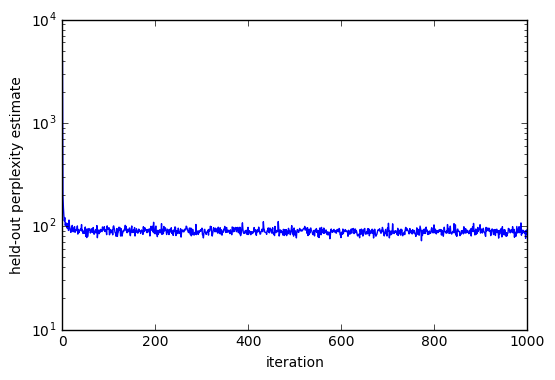

In [93]:
from matplotlib import pyplot as plt

# plt.figure()
# plt.plot(range(len(rho)), rho)
# plt.ylabel('rho')
# plt.xlabel('iteration')
# plt.show()

plt.figure()
plt.semilogy(range(len(perplex)), perplex)
plt.ylabel('held-out perplexity estimate')
plt.xlabel('iteration')
plt.show()

## Print vocabulary per topic

In [94]:
num_vocab_display = 10

for k in range(0, len(olda._lambda)):
    lambdak = list(olda._lambda[k, :])
    lambdak = lambdak / sum(lambdak)
    temp = zip(lambdak, range(0, len(lambdak)))
    temp = sorted(temp, key = lambda x: x[0], reverse=True)
    print 'topic %d:' % (k)
    for i in range(0, num_vocab_display):
        print '%20s  \t---\t  %.4f' % (vocab[temp[i][1]], temp[i][0])
    print

topic 0:


KeyError: 2037

## Variational Inference w/ no Stochastisisty

In [46]:
print "Parameters: \n\t Num topics: %d \n\t Num documents: %d" % (K, D)
print "\t prior on weight vectors (theta): %4.2f \n\t prior on topics (beta): %4.2f" % (1./K, 1./K)
print "\t burn in rate: %4.2f \n\t learning rate: %4.2f" % (1024., 0)

rho = []
perplex = []

olda = onlineldavb.OnlineLDA(vocab, K, D, 1./K, 1./K, 1024., 0)
for iteration in range(0, num_iterations):
    docset=newsgroups_train.data
    (gamma, bound) = olda.update_lambda(docset)
    (wordids, wordcts) = onlineldavb.parse_doc_list(docset, olda._vocab,False)
    perwordbound = bound * len(docset) / (D * sum(map(sum, wordcts)))
    rho.append(olda._rhot,)
    perplex.append(numpy.exp(-perwordbound))
    
    if (iteration % 50 == 0):
        print "Training iteration %d" % iteration
        

            
print "Done training"

Parameters: 
	 Num topics: 4 
	 Num documents: 11314
	 prior on weight vectors (theta): 0.25 
	 prior on topics (beta): 0.25
	 burn in rate: 1024.00 
	 learning rate: 0.90
Training iteration 0


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.semilogy(range(len(perplex)), perplex)
plt.ylabel('held-out perplexity estimate')
plt.xlabel('iteration')
plt.show()